# Introduction to Logistic Regression

As you all know I've been doing a article series on machine learning concepts and this is the first article on logistic regression. You can also find the articles on my previous posts, so for more updates follow me on:

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)

# Logictic Regression Basics

## What is Logistic Regression?

`Logistic Regression` is a `classification algorithm` which is used to `predict` the `probability` of a `binary class` or `multiple classes` of a given `input`. 

It is a supervised learning algorithm which means that it is trained on a `labeled dataset` and it can be used to predict the `output` of a given `input`.

> I like to call it the `linear regression` of categorical data.

## How does it work?

Let's say we have a `dataset` like this:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
df = pd.DataFrame(
    data = {
        'Feature' : np.arange(1,101),
        'Target' : np.array([0]*60 + [1]*40)
    }
)

df.head()

,Feature,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Here, I made a very simple data set with `feature` and `target` and If I traina linear regression model on this data, it will give me a regression line like below.

> in the dataset I have the first 60 samples of target set as 0 and rest is set to 1 for better unserstanding.

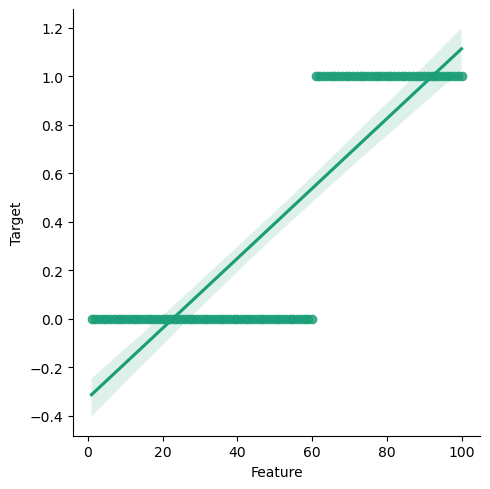

In [3]:
import seaborn as sns
sns.set_palette('Dark2')
sns.lmplot(x='Feature', y='Target', data=df)

Now, this is not a bas model. We can clearly see that it is trying to predict the the values from `0` to `1` and the prediction sometimes can be fractional.

But the huge problem is that the categorical variables cannot be converted into numbers. And there is another issue that if you look closely at the regression line, right aroung the value of `20` of the feature `axis` the value is less than `0` which is not possible, what does negetive category even mean?

So, we need a clear way to predict categorical values and no more fractions or negative values.

### Sigmoid

I don't know if you ever heard of the `sigmoid function`. It is a non-linear function that takes a input and transforms it into `0` to `1` range. 

The `sigmoid function` is defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Here, $x$ is the input and $\sigma(x)$ is the output.

Now, what does this function has to do with the `logistic regression`? Well, the `sigmoid function` is used to transform the input into the output. So, if you have a `feature` that is `categorical` and you want to predict it in the `0` to `1` range, you can use the `sigmoid function` to transform the input of a `linear regression` into the output from `0` to `1` range.

This is how a sigmoid function looks like:
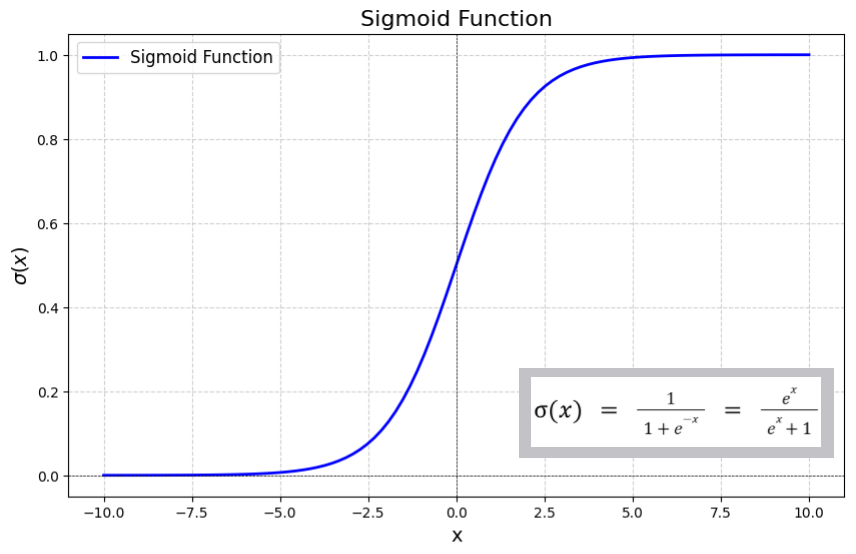

This is used because this represents the probalility of the `feature` being `1` or `0` and sometimes the probability can be a fractional value but it is for a very small range of the feature values.

So, what we can do is set a cutoff value for the `sigmoid function` like `0.5`. If the probability is greater than `0.5` then the value is `1` and if the probability is less than `0.5` then the value is `0`.

So, how do we use this function in the `logistic regression`? 

### Sigmoid to Logistic Regression

So, previously we learned that the sigmoid function can transform the input of any value into the output from `0` to `1` range and it represents the probability of the `feature` being `1` or `0`. So, we can use this function to transform the input of the `linear regression` into the output from `0` to `1` range too.

So, the regression line is now:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

As, $x$ is the input and $\sigma(x)$ is the output, we can replce $x$ with the equation of the `linear regression` and get the equation of the `logistic regression`.

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(\hat{y})}}
$$

Where $\hat{y}$ is the output of the `linear regression`. So, the final equation of the `logistic regression` is:

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}
$$

or more simply:

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(mx + c)}}
$$

Here, $\beta_0$ or `c` is the intercept and $\beta_1$ or `m` is the slope of the regression line.

And we have a clear equation of the `logistic regression` now.

> The sigmoid function is also know as the `logistic function` and that's where the name `logistic regression` comes from.

So, if we combine the two equations in a graph we should get something like this:

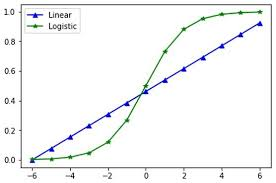


In [4]:
df_jitter = df.copy()
df_jitter["Target"] = df_jitter["Target"] + np.random.normal(0, 0.03, size=len(df))
df_jitter["Target"] = df_jitter["Target"].clip(0, 1)

> Ps: for demostrating the code logistic regression line with linear regression line, I have to add some noise to the data. 

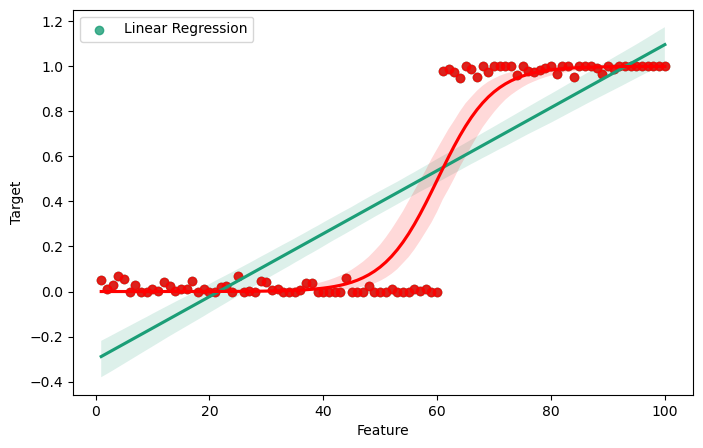

In [5]:
plt.figure(figsize=(8, 5))

# Linear regression
sns.regplot(
    x="Feature",
    y="Target",
    data=df_jitter,
    label="Linear Regression"
)

# Logistic regression (sigmoid)
sns.regplot(
    x="Feature",
    y="Target",
    data=df_jitter,
    logistic=True,
    color="red",
)

plt.legend()
plt.show()


> To use the logistic argument in the code, you need to install the `statsmodels` library. you can install it using conda by running `conda install statsmodels` 

And that's it. So, we can clearly see that logistic regression is transforming the `regression` line into a `logistic function`. 

And we can now use this concept to do `binary classification` and `multiclass classification`.

> Multiclass classification is more complecated than binary classification with logistic regression because the sigmoid function is defined for only one value. 

I hope you unserstand the concept of `logistic regression` and now we can pracitcally train a model with `logistic regression`.

# So Let's Get Some Data

Let's use maybe `the most popular dataset` in the world. It's called `Titanic Dataset`. You can find this data set from [Kaggle](https://www.kaggle.com/competitions/titanic/data)

You will find two datasets there. One is the `train` dataset and the other is the `test` dataset.

> This is from a competition. So, the data is not clean. But, it's good enough for us to practice.

So, let's load and see the data.

In [6]:
data = pd.read_csv('./titanic_train.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now, what does the features of this data represent?

- `PassengerId`: The unique identifier for each passenger.
- `Survived`: Whether the passenger survived the sinking of the Titanic.
- `Pclass`: The passenger's class, which can be one of the following:
  - 1st
  - 2nd
  - 3rd
- `Name`: The passenger's name.
- `Sex`: The passenger's sex, which can be one of the following:
  - Male
  - Female
- `Age`: The passenger's age in years.
- `SibSp`: The number of siblings/spouses aboard the Titanic.
- `Parch`: The number of parents/children aboard the Titanic.
- `Ticket`: The unique identifier for each passenger's ticket.
- `Fare`: The passenger's fare, which can be one of the following:
  - 0.25
  - 1.00
  - 2.00
- `Cabin`: The passenger's cabin number.
- `Embarked`: The passenger's embarkation port, which can be one of the following:
  - Cherbourg(C)
  - Queenstown(Q)
  - Southampton(S)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that this dataset has `12` features and `891` samples and we can clearly see from the info that there are features that has some `missing values`.

We still don't know the `target` variable but that's okay, let's do some exploration.

# Analysis & Cleaning

First let's deal with the `missing values`.

Sometimes we have to deal with multiple features with missing values. In this case that is true. We have 3 features that have missing values. 

So, what do we do.

First we need to think if we can save the features that have missing values. 

So, for a huge dataset it might be helpful to visualize the columns to find out which features have missing values.

Now, what do I mean by `visualize the columns`?

There is a method in pandas dataframes that gives you a `boolean dataframe` that indicates which samples of a features has missing values.

That is `isnull()`.


In [9]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


As you can see, this method returns the whole dataframe with only `true` or `false` values.

> True if the value is null and False if the value is not null.

We can use this method check which features is irredeemable.

but how?

By using `heatmap`.

Sounds weird right?

Let's just make a heatmap with the `isnull()` method.

<Axes: >

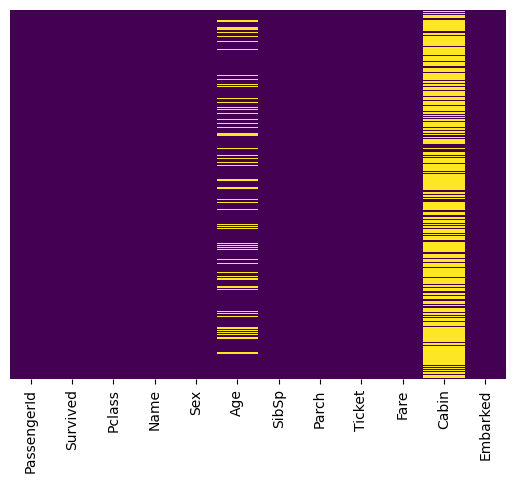

In [15]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Now, you can see that the heatmap is showing us the features and the different colors are representing the `true` and `false` values. 

> yticklabels=False means that we don't want to show the y axis labels.
> cbar=False means that we don't want to show the color bar.
> cmap="viridis" means that we want to use the viridis color map.

The yellow color represents the missing datapoints. And we can clearly see that, `cabin` feature has too many missing values and clearly it is unusable and we should remove it from our model.

So, let's just drop the feature.

In [17]:
data.drop(columns=['Cabin'], inplace=True)

Now, let's do some more data visualization.